## Case Level Metrics

In [7]:
import pandas as pd

In [6]:


for prefix in ['reader_1', 'reader_2']:
    readers_results = rf'D:\UserData\z004b0je\OneDrive - Siemens Healthineers\Projects\Prostate MR\innovation_path\pilot_study\readers_annotation\{prefix}_annotation.xlsx'
    perf_results = rf'D:\UserData\z004b0je\OneDrive - Siemens Healthineers\Projects\Prostate MR\innovation_path\pilot_study\perf_results\{prefix}_perf_results.xlsx'
    readers_df = pd.read_excel(readers_results)
    readers = ['KQQ', 'LF', 'WHC', 'YJY', 'ZHY', 'WL', 'WZ']
#readers = ['WJ1', 'WJ2', 'WTL1', 'WTL2', 'XPY1', 'XPY2']

SyntaxError: invalid syntax (<ipython-input-6-81d4cab85b51>, line 1)

In [9]:
for prefix in ['reader_1', 'reader_2']:
    readers_results = rf'D:\UserData\z004b0je\OneDrive - Siemens Healthineers\Projects\Prostate MR\innovation_path\pilot_study\readers_annotation\{prefix}_annotation.xlsx'
    perf_results = rf'D:\UserData\z004b0je\OneDrive - Siemens Healthineers\Projects\Prostate MR\innovation_path\pilot_study\perf_results\{prefix}_perf_results.xlsx'
    readers_df = pd.read_excel(readers_results)
    readers = ['KQQ', 'LF', 'WHC', 'YJY', 'ZHY', 'WL', 'WZ']

    perf_dict = dict()
    cols = ['Reader', 'PIRADs_Thres', 'ISUP_Thres', 'Sensitivity', 'Specificity', 'Precision', 'Accuracy','Youden', 'TP', 'FP', 'TN', 'FN']
    for col in cols:
        perf_dict.setdefault(col, [])
    for Reader in readers:
        for ISUP_Thres in [1,2]:
            for PIRADs_Thres in [3,4]:
                TP, FP, TN, FN = 0,0,0,0
                for idx, row in readers_df.iterrows():
                    if row[Reader] >= PIRADs_Thres:
                        if row.ISUP >= ISUP_Thres:
                            TP += 1
                        else:
                            FP += 1
                    else:
                        if row.ISUP >= ISUP_Thres:
                            FN += 1
                        else:
                            TN += 1
                Sensitivity = round(TP/(TP+FN), 4)
                Specificity = round(TN/(TN+FP), 4)
                Precision = round(TP/(TP+FP), 4)
                Accuracy = round((TP+TN)/(TP+FP+TN+FN), 4)
                Youden = Sensitivity + Specificity - 1
                for col in cols:
                    perf_dict[col].append(eval(col))
    perf_df = pd.DataFrame(perf_dict)
    perf_df.to_excel(perf_results, index=False)


## Case Level ROC

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [11]:
def roc_pic(fpr, tpr, auc_score, pic_name):
    lw = 2
    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label=f'ROC curve {auc_score}')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig(pic_name, bbox_inches='tight', dpi=100)

In [17]:
read_round = 2
readers_results = rf'D:\UserData\z004b0je\OneDrive - Siemens Healthineers\Projects\Prostate MR\innovation_path\pilot_study\readers_annotation\reader_{read_round}_annotation.xlsx'
perf_results_root = rf'D:\UserData\z004b0je\OneDrive - Siemens Healthineers\Projects\Prostate MR\innovation_path\pilot_study\perf_results'
readers_df = pd.read_excel(readers_results)
readers = ['KQQ', 'LF', 'WHC', 'YJY', 'ZHY', 'WL', 'WZ']

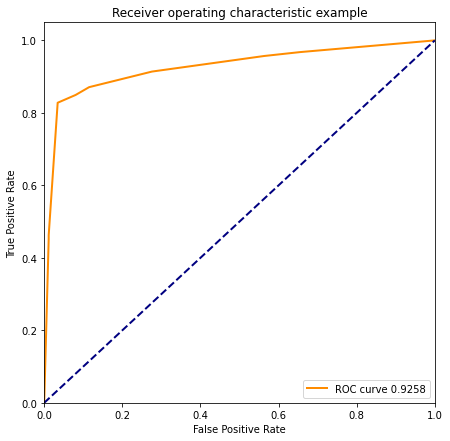

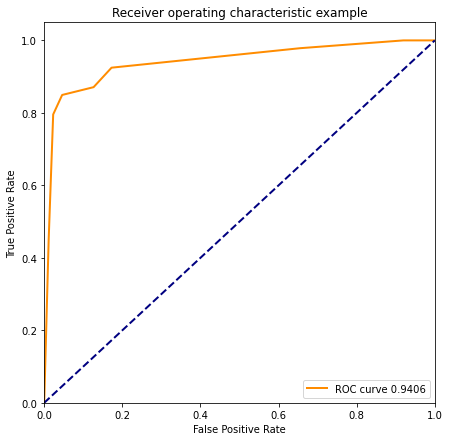

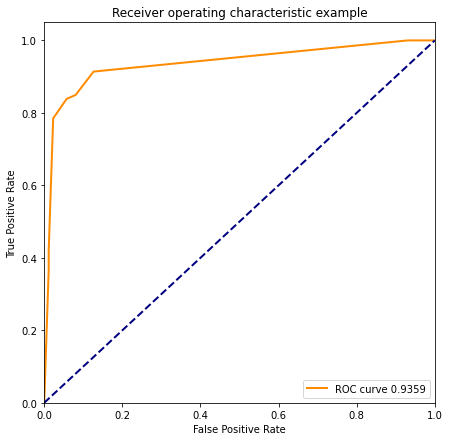

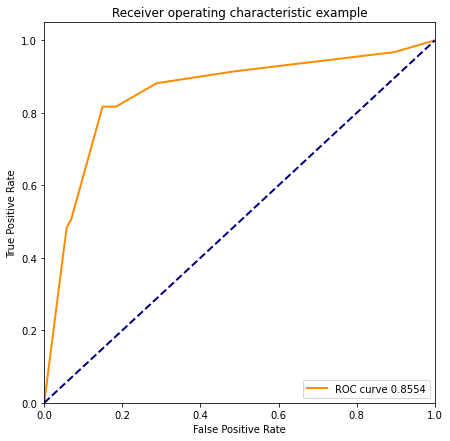

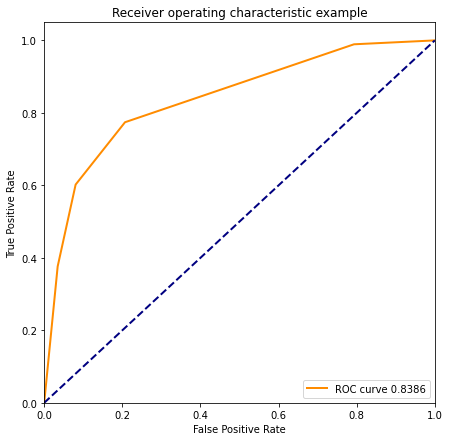

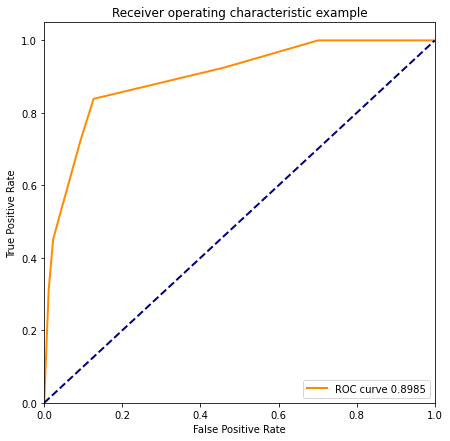

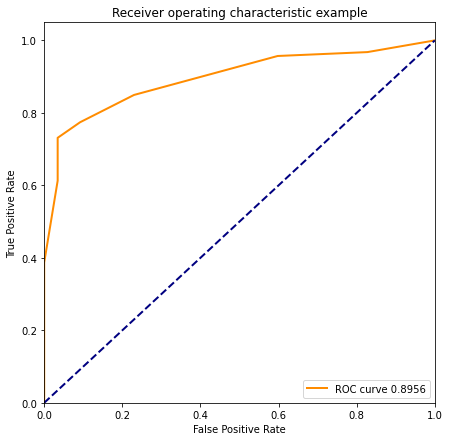

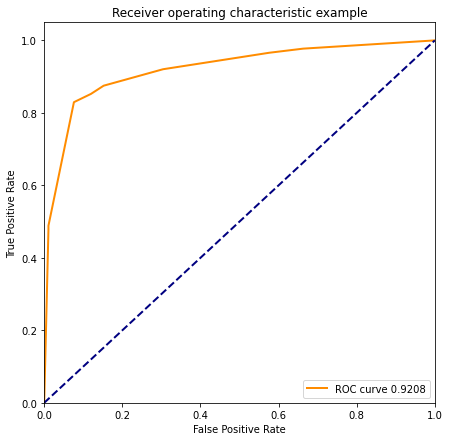

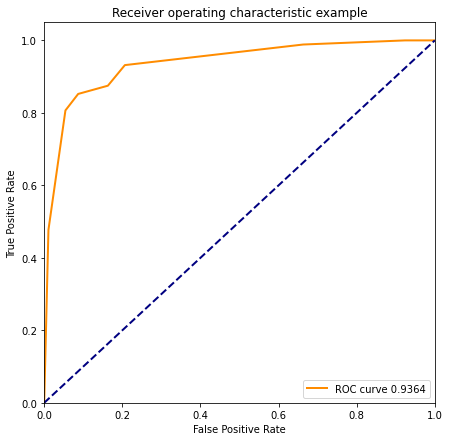

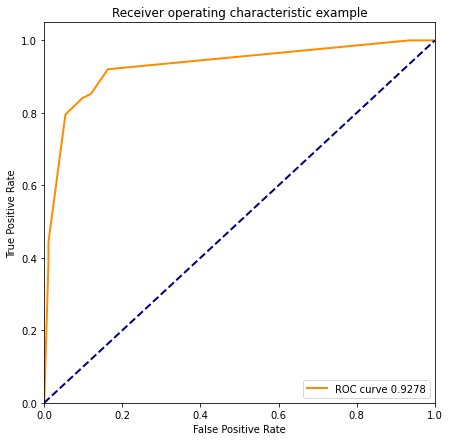

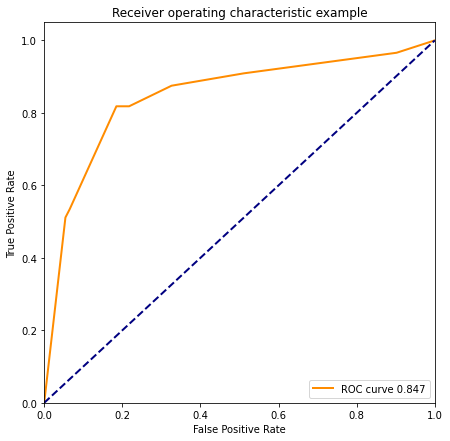

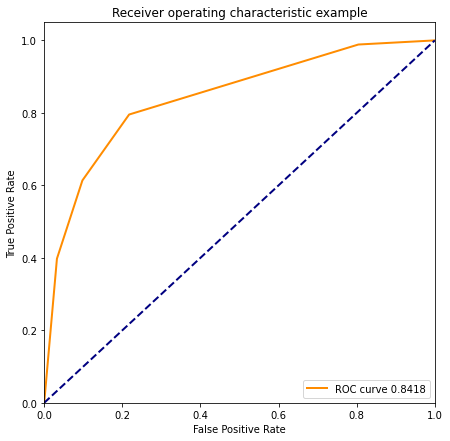

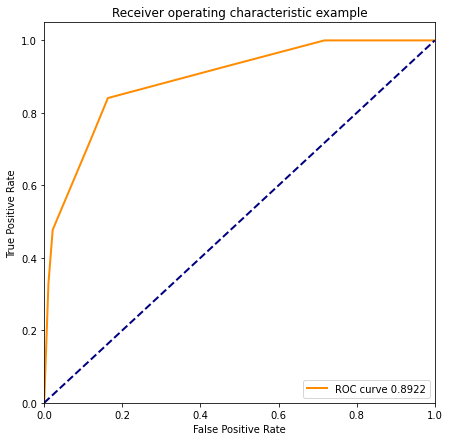

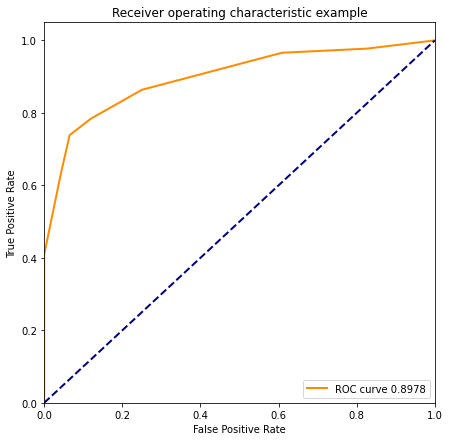

In [18]:
draw_roc = True
perf_dict = dict()
cols = ['ISUP_Thres', 'Reader', 'AUC']
for col in cols:
    perf_dict.setdefault(col, [])
for ISUP_Thres in [1,2]:
    for Reader in readers:
        reader_los = list(readers_df[Reader+'_S'])
        gt = [1 if x >= ISUP_Thres else 0 for x in readers_df['ISUP']]
        fpr, tpr, _ = roc_curve(gt, reader_los)
        AUC = round(auc(fpr, tpr),4)
        if draw_roc:
            roc_pic_name = f'{Reader}_round{read_round}_ISUP{ISUP_Thres}_roc.png'
            roc_file = os.path.join(perf_results_root, roc_pic_name) 
            roc_pic(fpr, tpr, AUC, roc_file)
        for col in cols:
            perf_dict[col].append(eval(col))
perf_df = pd.DataFrame(perf_dict)
perf_df.to_excel(os.path.join(perf_results_root, f'auc_{read_round}_results.xlsx'), index=False)